In [5]:
class Rnn(nn.Module):
    def __init__(self, in_dim, hidden_dim, n_layer, n_class):
        super(Rnn, self).__init__()
        self.n_layer = n_layer
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(in_dim, hidden_dim, n_layer,
                            batch_first=True)
        self.classifier = nn.Linear(hidden_dim, n_class)
 
    def forward(self, x):
        # h0 = Variable(torch.zeros(self.n_layer, x.size(1),
                                #   self.hidden_dim)).cuda()
        # c0 = Variable(torch.zeros(self.n_layer, x.size(1),
                                #   self.hidden_dim)).cuda()
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        out = self.classifier(out)
        return out
 
model = Rnn(28, 128, 2, 10)  # 图片大小是28x28
use_gpu = torch.cuda.is_available()  # 判断是否有GPU加速
if use_gpu:
    model = model.cuda()
# 定义loss和optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

C:\Users\xue\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [ ]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [19]:
x = torch.unsqueeze(torch.linspace(-1,1,100),dim = 1)
y = x.pow(2) + 0.2 * torch.rand(x.size())
#plt.scatter(x.numpy(),y.numpy())

In [36]:
class Net(torch.nn.Module):
    def __init__(self,n_features,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(n_features,n_hidden)
        self.predict = torch.nn.Linear(n_hidden,n_output)
    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x
        

In [68]:
net = Net(2,10,2)#[0,1],[1,0]
print(net)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)


In [81]:
optimizer = torch.optim.SGD(net.parameters(),lr = 0.05)
#loss_func = torch.nn.MSELoss()
loss_func = torch.nn.CrossEntropyLoss()

In [74]:
'''
plt.ion()
plt.show()
for t in range(100):
    #
   # print(t)
    prediction = net(x)
    loss = loss_func(prediction,y)#prediction + y
    optimizer.zero_grad()#归零
    loss.backward()
    optimizer.step()
    if t %5:
        plt.cla()
        plt.scatter(x.data.numpy(),y.data.numpy())
        plt.plot(x.data.numpy(),prediction.data.numpy())
'''

'\nplt.ion()\nplt.show()\nfor t in range(100):\n    #\n   # print(t)\n    prediction = net(x)\n    loss = loss_func(prediction,y)#prediction + y\n    optimizer.zero_grad()#归零\n    loss.backward()\n    optimizer.step()\n    if t %5:\n        plt.cla()\n        plt.scatter(x.data.numpy(),y.data.numpy())\n        plt.plot(x.data.numpy(),prediction.data.numpy())\n'

In [ ]:
n_data = torch.ones(100,2)
x0 = torch.normal(2 * n_data,1)
y0 = torch.zeros(100)
x1 = torch.normal(-2 * n_data,1)
y1 = torch.ones(100)
x = torch.cat((x0,x1),0).type(torch.FloatTensor)
y = torch.cat((y0,y1),).type(torch.LongTensor)
#print(y.numpy())
plt.scatter(x.numpy()[:,0],x.numpy()[:,1],c=y.data,s = 100,lw = 0)

C:\Users\xue\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


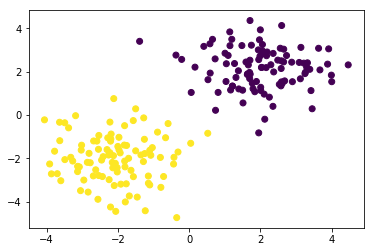

In [83]:
plt.ion()
plt.show()
for t in range(100):
    #
   # print(t)
    out = net(x)
    loss = loss_func(out,y)#prediction + y
    optimizer.zero_grad()#归零
    loss.backward()
    optimizer.step()
    if t %5:
        plt.cla()
        prediction = torch.max(F.softmax(out),1)[1]#[1]最大概率的位置
        pred_y = prediction.numpy().squeeze()
        plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],c= pred_y)
        #plt.plot(x.data.numpy(),prediction.data.numpy())
    plt.ioff()
   # plt.show()